Consider the image dataset https://www.kaggle.com/slothkong/10-monkey-species 
Instructions:
Apply at most 10 epochs so that your program running time will be reduced.
Create an unclassified images folder (as demonstrated during sessions) intending to test the model (at most 3 images of each type, keep them in that folder)
You can apply any regularization option taught in the class


Do the following with this dataset:
Apply simple convolutional neural network (layers of your choice) for classifying the images 
Apply transfer learning using any 2 models from https://www.tensorflow.org/api_docs/python/tf/keras/applications (trainable layers of your choice)
Mention which model is having better accuracy.


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
train_dir = "C:/Users/lkosh/Desktop/MachineLearning/Cases/monkey/training/training"
validation_dir = "C:/Users/lkosh/Desktop/MachineLearning/Cases/monkey/validation/validation"

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generates Batches of tensorflow images
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [4]:
# Import Train Data from the directory and ite sub directory
train_generator = train_datagen.flow_from_directory(train_dir,batch_size=50,
                                                    class_mode='categorical', target_size=(150, 150))

Found 1098 images belonging to 10 classes.


In [5]:
# Import Validaiton Data from the directory and ite sub directory
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=50,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 272 images belonging to 10 classes.


In [6]:
import tensorflow as tf
tf.compat.v1.set_random_seed(2021)

# Apply simple convolutional neural network

In [7]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Organic') 
    # and 1 for the other ('Recycled')
    tf.keras.layers.Dense(10, activation='softmax')  
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

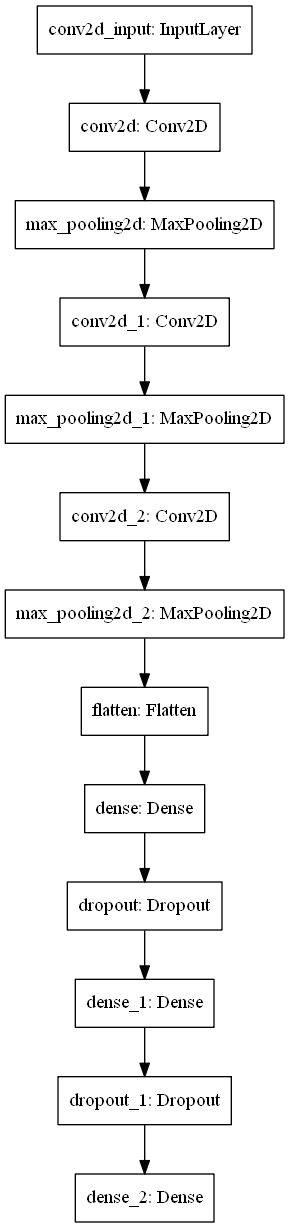

In [9]:
from tensorflow import keras
keras.utils.plot_model(model, "my_cnn_model.png")

In [10]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, 
                        verbose=1, mode='auto',restore_best_weights=True)
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['acc'])

In [11]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              #steps_per_epoch=50,
                    epochs=10,
                              #validation_steps=50,
                              verbose=2, callbacks=[monitor])

Epoch 1/10
22/22 - 88s - loss: 2.6467 - acc: 0.1758 - val_loss: 2.1769 - val_acc: 0.1985
Epoch 2/10
22/22 - 57s - loss: 1.9547 - acc: 0.3106 - val_loss: 2.3564 - val_acc: 0.2610
Epoch 3/10
22/22 - 58s - loss: 1.6406 - acc: 0.4372 - val_loss: 1.6503 - val_acc: 0.3860
Epoch 4/10
22/22 - 60s - loss: 1.3787 - acc: 0.5428 - val_loss: 1.4208 - val_acc: 0.5662
Epoch 5/10
22/22 - 61s - loss: 1.0997 - acc: 0.6530 - val_loss: 1.5125 - val_acc: 0.4853
Epoch 6/10
22/22 - 61s - loss: 0.7963 - acc: 0.7368 - val_loss: 1.3254 - val_acc: 0.5846
Epoch 7/10
22/22 - 61s - loss: 0.6697 - acc: 0.7769 - val_loss: 1.2107 - val_acc: 0.5882
Epoch 8/10
22/22 - 68s - loss: 0.4181 - acc: 0.8652 - val_loss: 2.2792 - val_acc: 0.5147
Epoch 9/10
22/22 - 59s - loss: 0.3700 - acc: 0.8807 - val_loss: 1.7395 - val_acc: 0.5147
Epoch 10/10
22/22 - 67s - loss: 0.2373 - acc: 0.9262 - val_loss: 1.4393 - val_acc: 0.6066


In [12]:
test2_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_dir = "C:/Users/lkosh/Desktop/MachineLearning/Cases/monkey/test"

In [13]:
test_generator =  test2_datagen.flow_from_directory(test_dir,
                                                    batch_size=6,
                                                    class_mode  = None,
                                                    target_size = (150, 150),
                                                    shuffle=False)

Found 30 images belonging to 1 classes.


In [14]:
y_prob = model.predict(test_generator,callbacks=[monitor])

In [15]:
cls = []
classes = list(train_generator.class_indices.keys())

In [16]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [17]:
cls

['n0',
 'n0',
 'n0',
 'n1',
 'n1',
 'n1',
 'n2',
 'n2',
 'n2',
 'n3',
 'n3',
 'n3',
 'n4',
 'n4',
 'n4',
 'n5',
 'n5',
 'n5',
 'n6',
 'n6',
 'n6',
 'n7',
 'n7',
 'n7',
 'n8',
 'n8',
 'n8',
 'n9',
 'n9',
 'n9']

In [18]:
y_prob

array([[9.99877453e-01, 3.15481827e-08, 6.38402353e-09, 8.01669287e-10,
        4.78498929e-09, 1.06749430e-05, 1.67753901e-11, 2.01557885e-11,
        1.22697813e-07, 1.11680944e-04],
       [9.91167665e-01, 6.99704469e-05, 9.89657110e-07, 2.86500903e-08,
        1.90574294e-08, 2.83937971e-03, 3.07729442e-09, 8.99536943e-08,
        1.18813296e-05, 5.90997888e-03],
       [9.95466113e-01, 4.16968351e-06, 7.64517779e-07, 1.09660562e-07,
        8.22763411e-07, 1.64796351e-04, 2.27371224e-08, 2.08174427e-07,
        2.56066996e-05, 4.33731126e-03],
       [1.75443787e-07, 9.99900937e-01, 3.91693584e-06, 1.59317551e-05,
        1.97996499e-07, 4.30988512e-05, 8.40690245e-06, 1.78618902e-05,
        5.94313349e-07, 8.65403490e-06],
       [3.97140987e-09, 9.99992490e-01, 7.20114997e-07, 6.68687292e-08,
        3.31932884e-11, 1.87450198e-07, 1.14353049e-09, 9.08622233e-10,
        7.99525834e-10, 6.39540804e-06],
       [1.34706817e-04, 9.96485114e-01, 1.78725793e-04, 1.87277223e-03,
   

In [19]:

def plot_learning_curve(history,epochs):
    epochs = np.arange(1,epochs+1)
    plt.figure(figsize=(10,6))
    plt.plot(epochs,history.history['acc'])
    plt.plot(epochs,history.history['val_acc'])
    plt.title("Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel("Accuracy")
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()
    
    plt.figure(figsize=(10,6)) 
    plt.plot(epochs,history.history['loss'])
    plt.plot(epochs,history.history['val_loss'])
    plt.title("Loss")
    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()
    

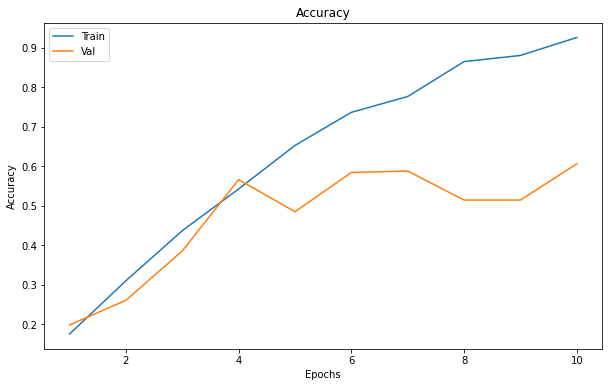

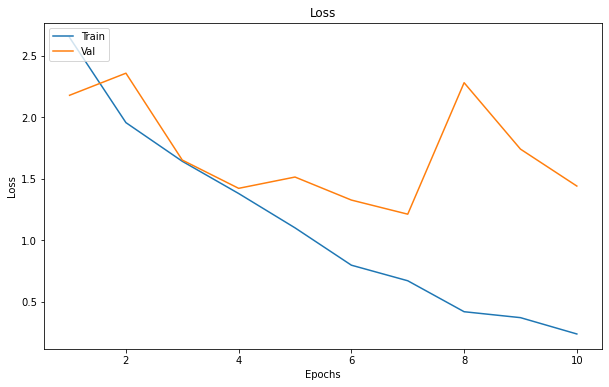

In [20]:
import matplotlib.pyplot as plt
plot_learning_curve(history,10)



# Apply Transfer Learning


# 1.InceptionV3

In [21]:
from tensorflow.keras.applications import InceptionV3

In [22]:
from tensorflow.keras import models, layers, optimizers
model_base = InceptionV3(weights='imagenet',include_top=False)

x = model_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512,activation='relu')(x)
predictions = layers.Dense(int(len(train_generator.class_indices.keys())) ,activation='softmax')(x)
InceptionV3_model = models.Model(inputs= model_base.input, outputs=predictions)

In [23]:
InceptionV3_model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9) ,metrics=['acc'])
history = InceptionV3_model.fit_generator(train_generator, epochs=10, shuffle=True, verbose=1, validation_data=validation_generator)

C:\Users\lkosh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\lkosh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
22/22 [==============================] - 178s 7s/step - loss: 2.4160 - acc: 0.0856 - val_loss: 3.1533 - val_acc: 0.0441
Epoch 2/10
22/22 [==============================] - 155s 7s/step - loss: 2.2434 - acc: 0.1594 - val_loss: 2.5882 - val_acc: 0.1140
Epoch 3/10
22/22 [==============================] - 176s 8s/step - loss: 2.0722 - acc: 0.2623 - val_loss: 2.2472 - val_acc: 0.2206
Epoch 4/10
22/22 [==============================] - 160s 7s/step - loss: 1.9622 - acc: 0.3461 - val_loss: 1.9922 - val_acc: 0.2831
Epoch 5/10
22/22 [==============================] - 150s 7s/step - loss: 1.8403 - acc: 0.4171 - val_loss: 1.8219 - val_acc: 0.3787
Epoch 6/10
22/22 [==============================] - 150s 7s/step - loss: 1.7159 - acc: 0.5118 - val_loss: 1.7181 - val_acc: 0.4375
Epoch 7/10
22/22 [==============================] - 150s 7s/step - loss: 1.6214 - acc: 0.5683 - val_loss: 1.6609 - val_acc: 0.4522
Epoch 8/10
22/22 [==============================] - 155s 7s/step - loss: 1.5524 - a

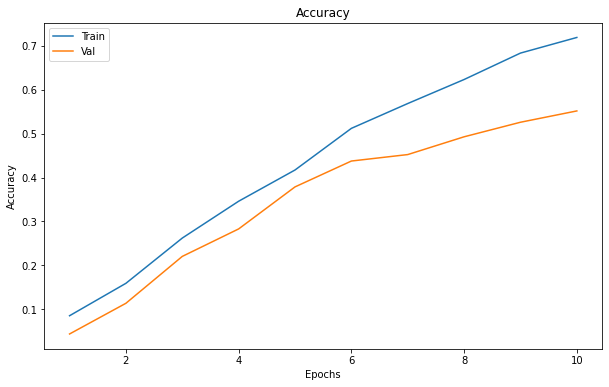

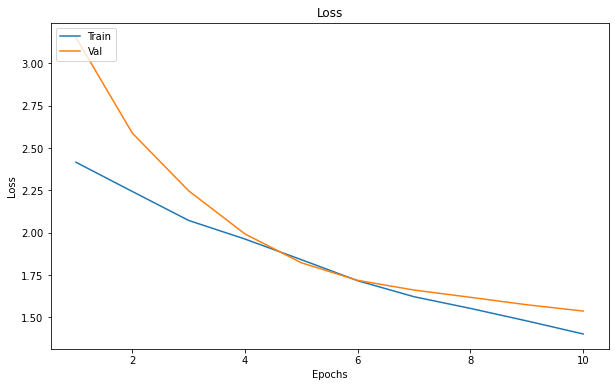

In [24]:
plot_learning_curve(history,10)

In [25]:
y_prob =InceptionV3_model.predict(test_generator,callbacks=[monitor])

In [26]:
cls = []
classes = list(train_generator.class_indices.keys())

In [27]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])
   

In [28]:
cls

['n8',
 'n0',
 'n0',
 'n1',
 'n1',
 'n3',
 'n2',
 'n2',
 'n7',
 'n3',
 'n3',
 'n3',
 'n4',
 'n4',
 'n4',
 'n7',
 'n7',
 'n5',
 'n6',
 'n6',
 'n6',
 'n7',
 'n1',
 'n7',
 'n6',
 'n8',
 'n4',
 'n3',
 'n7',
 'n9']

# 2. Apply ResNet50

In [29]:
from tensorflow.keras.applications import ResNet50

In [30]:
model_base = ResNet50(weights='imagenet',include_top=False)

x = model_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512,activation='relu')(x)
predictions = layers.Dense(int(len(train_generator.class_indices.keys())) ,activation='softmax')(x)
Resnet50_model = models.Model(inputs= model_base.input, outputs=predictions)

In [31]:
Resnet50_model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9) ,metrics=['acc'])
history = Resnet50_model.fit_generator(train_generator, epochs=10, shuffle=True, verbose=1, validation_data=validation_generator)

C:\Users\lkosh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\lkosh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
22/22 [==============================] - 340s 15s/step - loss: 2.6255 - acc: 0.0993 - val_loss: 2.4373 - val_acc: 0.0588
Epoch 2/10
22/22 [==============================] - 335s 15s/step - loss: 2.2240 - acc: 0.1803 - val_loss: 2.3928 - val_acc: 0.0735
Epoch 3/10
22/22 [==============================] - ETA: 0s - loss: 1.8950 - acc: 0.3506 - 358s 16s/step - loss: 1.8950 - acc: 0.3506 - val_loss: 2.3838 - val_acc: 0.1103
Epoch 4/10
22/22 [==============================] - 506s 22s/step - loss: 1.6370 - acc: 0.5109 - val_loss: 2.3887 - val_acc: 0.0993
Epoch 5/10
22/22 [==============================] - 391s 17s/step - loss: 1.4090 - acc: 0.6311 - val_loss: 2.4922 - val_acc: 0.0956
Epoch 6/10
22/22 [==============================] - 316s 14s/step - loss: 1.2276 - acc: 0.7277 - val_loss: 2.6665 - val_acc: 0.0956
Epoch 7/10
22/22 [==============================] - 313s 14s/step - loss: 1.0559 - acc: 0.8297 - val_loss: 2.7765 - val_acc: 0.0956
Epoch 8/10
22/22 [===================

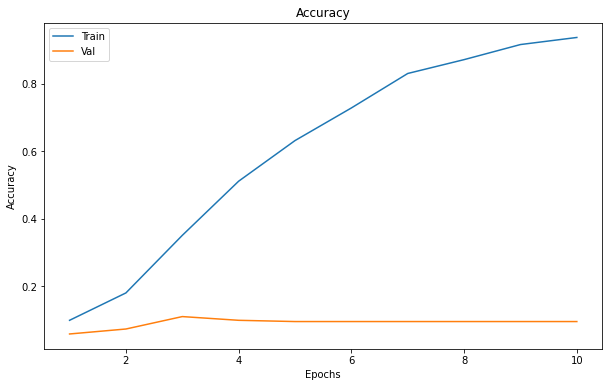

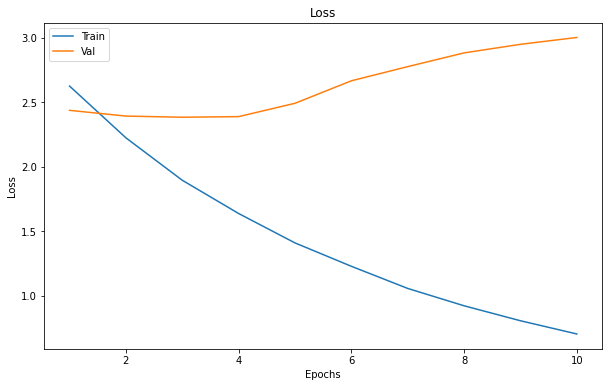

In [32]:
plot_learning_curve(history,10)

In [33]:
y_prob =Resnet50_model.predict(test_generator,callbacks=[monitor])

In [34]:
cls = []
classes = list(train_generator.class_indices.keys())

In [35]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [36]:
cls

['n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4',
 'n4']

# If learning rate RMSprop

In [37]:
Resnet50_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001) ,metrics=['acc'])
history = Resnet50_model.fit_generator(train_generator, epochs=10, shuffle=True, verbose=1, validation_data=validation_generator)

C:\Users\lkosh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
22/22 [==============================] - 444s 16s/step - loss: 2.8959 - acc: 0.2413 - val_loss: 13247.1309 - val_acc: 0.0993
Epoch 2/10
22/22 [==============================] - 282s 13s/step - loss: 2.0105 - acc: 0.3479 - val_loss: 3068.2532 - val_acc: 0.1103
Epoch 3/10
22/22 [==============================] - 271s 12s/step - loss: 1.4848 - acc: 0.5173 - val_loss: 864.8661 - val_acc: 0.1103
Epoch 4/10
22/22 [==============================] - 260s 12s/step - loss: 1.0695 - acc: 0.6849 - val_loss: 29849.5645 - val_acc: 0.0993
Epoch 5/10
22/22 [==============================] - 258s 12s/step - loss: 0.3962 - acc: 0.8752 - val_loss: 5.0502 - val_acc: 0.0993
Epoch 6/10
22/22 [==============================] - 263s 12s/step - loss: 0.5366 - acc: 0.8716 - val_loss: 12395.1816 - val_acc: 0.0956
Epoch 7/10
22/22 [==============================] - 232s 11s/step - loss: 0.3117 - acc: 0.9162 - val_loss: 1301.4800 - val_acc: 0.0956
Epoch 8/10
22/22 [==============================] - 229s

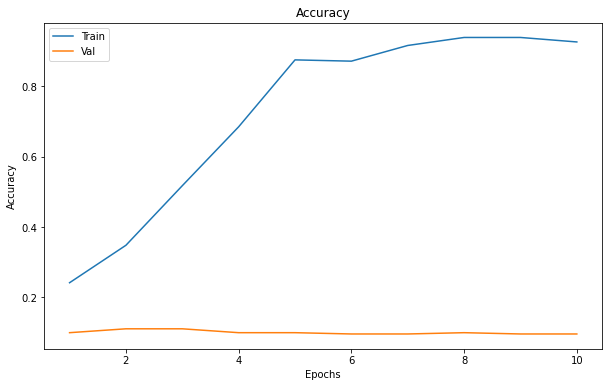

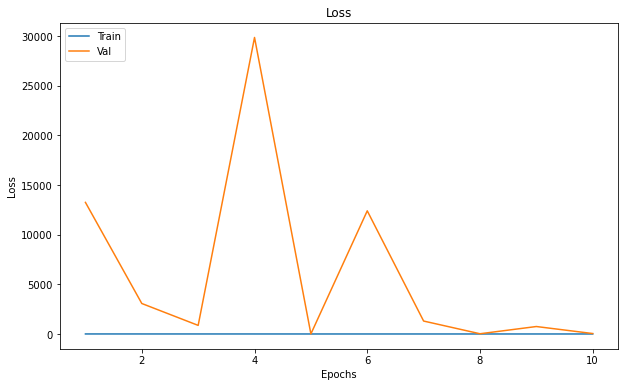

In [38]:
plot_learning_curve(history,10)

In [39]:
y_prob =Resnet50_model.predict(test_generator,callbacks=[monitor])

In [40]:
cls = []
classes = list(train_generator.class_indices.keys())

In [41]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [42]:
cls

['n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6',
 'n6']

# Apply MobileNet

In [43]:
from tensorflow.keras.applications import MobileNet

In [44]:
model_base = MobileNet(weights='imagenet',include_top=False)

x = model_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512,activation='relu')(x)
predictions = layers.Dense(int(len(train_generator.class_indices.keys())) ,activation='softmax')(x)
MobileNet_model = models.Model(inputs= model_base.input, outputs=predictions)

17227776/17225924 [==============================] - 3s 0us/step


In [45]:
MobileNet_model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9) ,metrics=['acc'])
history = MobileNet_model.fit_generator(train_generator, epochs=10, shuffle=True, verbose=1, validation_data=validation_generator)

C:\Users\lkosh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\lkosh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
22/22 [==============================] - 126s 5s/step - loss: 2.5710 - acc: 0.1466 - val_loss: 2.7005 - val_acc: 0.1801
Epoch 2/10
22/22 [==============================] - 90s 4s/step - loss: 2.1050 - acc: 0.2577 - val_loss: 2.0961 - val_acc: 0.2868
Epoch 3/10
22/22 [==============================] - 82s 4s/step - loss: 1.7313 - acc: 0.4117 - val_loss: 1.7432 - val_acc: 0.4228
Epoch 4/10
22/22 [==============================] - 81s 4s/step - loss: 1.4567 - acc: 0.5246 - val_loss: 1.4882 - val_acc: 0.5110
Epoch 5/10
22/22 [==============================] - 88s 4s/step - loss: 1.2524 - acc: 0.6248 - val_loss: 1.3117 - val_acc: 0.5625
Epoch 6/10
22/22 [==============================] - 84s 4s/step - loss: 1.0655 - acc: 0.7250 - val_loss: 1.1859 - val_acc: 0.6066
Epoch 7/10
22/22 [==============================] - 82s 4s/step - loss: 0.9101 - acc: 0.7987 - val_loss: 1.0868 - val_acc: 0.6360
Epoch 8/10
22/22 [==============================] - 82s 4s/step - loss: 0.8189 - acc: 0.8

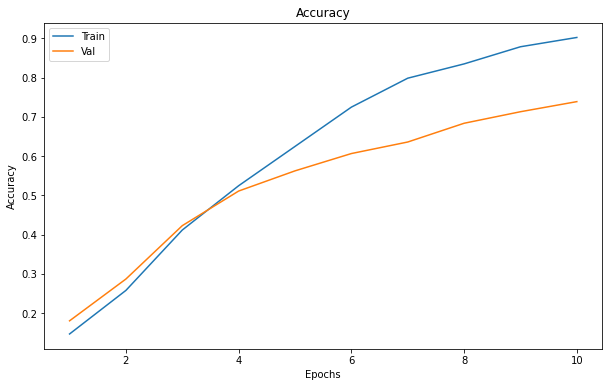

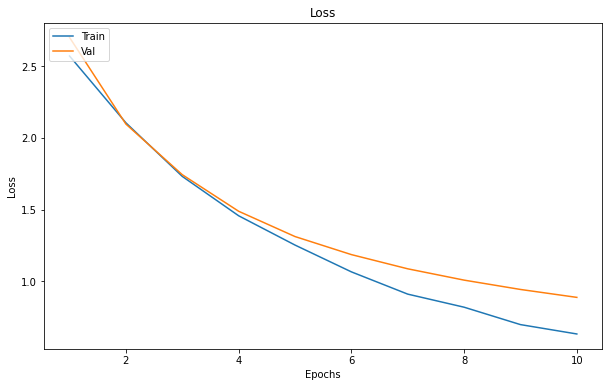

In [46]:
plot_learning_curve(history,10)

In [51]:
y_prob =MobileNet_model.predict(test_generator,callbacks=[monitor])

In [52]:
cls = []
classes = list(train_generator.class_indices.keys())

In [53]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [54]:
cls

['n0',
 'n0',
 'n0',
 'n1',
 'n1',
 'n3',
 'n2',
 'n2',
 'n2',
 'n3',
 'n3',
 'n3',
 'n4',
 'n4',
 'n4',
 'n5',
 'n5',
 'n3',
 'n6',
 'n6',
 'n6',
 'n7',
 'n1',
 'n7',
 'n8',
 'n8',
 'n8',
 'n5',
 'n9',
 'n9']